# Stock Market Risk Measurement - Toronto Stock Exchange

## Web Scraping & Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import yfinance as yf

In [2]:
GSPTSE = yf.download('^GSPTSE', start = '2000-01-01', end = '2020-12-01')
GSPTSE

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,8271.700195,8305.900391,8157.600098,8202.599609,8202.599609,5950980000
2000-01-05,8100.200195,8147.200195,8018.600098,8119.399902,8119.399902,9454570000
2000-01-06,8137.000000,8186.399902,8075.700195,8114.200195,8114.200195,7969010000
2000-01-07,8193.400391,8430.000000,8193.400391,8429.400391,8429.400391,8769310000
2000-01-10,8544.299805,8610.799805,8509.099609,8602.500000,8602.500000,8331700000
...,...,...,...,...,...,...
2020-11-24,17203.000000,17311.099609,17190.900391,17274.300781,17274.300781,32208740000
2020-11-25,17278.400391,17323.800781,17215.500000,17313.099609,17313.099609,24908110000
2020-11-26,17306.199219,17366.599609,17301.900391,17351.300781,17351.300781,9880610000


In [3]:
GSPTSE.to_csv('GSPTSE.csv')

In [4]:
data = pd.read_csv('GSPTSE.csv', parse_dates = ['Date'], index_col = 'Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,8271.700195,8305.900391,8157.600098,8202.599609,8202.599609,5950980000
2000-01-05,8100.200195,8147.200195,8018.600098,8119.399902,8119.399902,9454570000
2000-01-06,8137.000000,8186.399902,8075.700195,8114.200195,8114.200195,7969010000
2000-01-07,8193.400391,8430.000000,8193.400391,8429.400391,8429.400391,8769310000
2000-01-10,8544.299805,8610.799805,8509.099609,8602.500000,8602.500000,8331700000
...,...,...,...,...,...,...
2020-11-24,17203.000000,17311.099609,17190.900391,17274.300781,17274.300781,32208740000
2020-11-25,17278.400391,17323.800781,17215.500000,17313.099609,17313.099609,24908110000
2020-11-26,17306.199219,17366.599609,17301.900391,17351.300781,17351.300781,9880610000


In [5]:
df = data.loc['2006':, 'Close'].to_frame()
df.to_csv('df.csv', index = False)
df

,Close
Date,
2006-01-03,11441.599609
2006-01-04,11501.500000
2006-01-05,11507.700195
2006-01-06,11620.500000
2006-01-09,11565.200195
...,...
2020-11-24,17274.300781
2020-11-25,17313.099609
2020-11-26,17351.300781


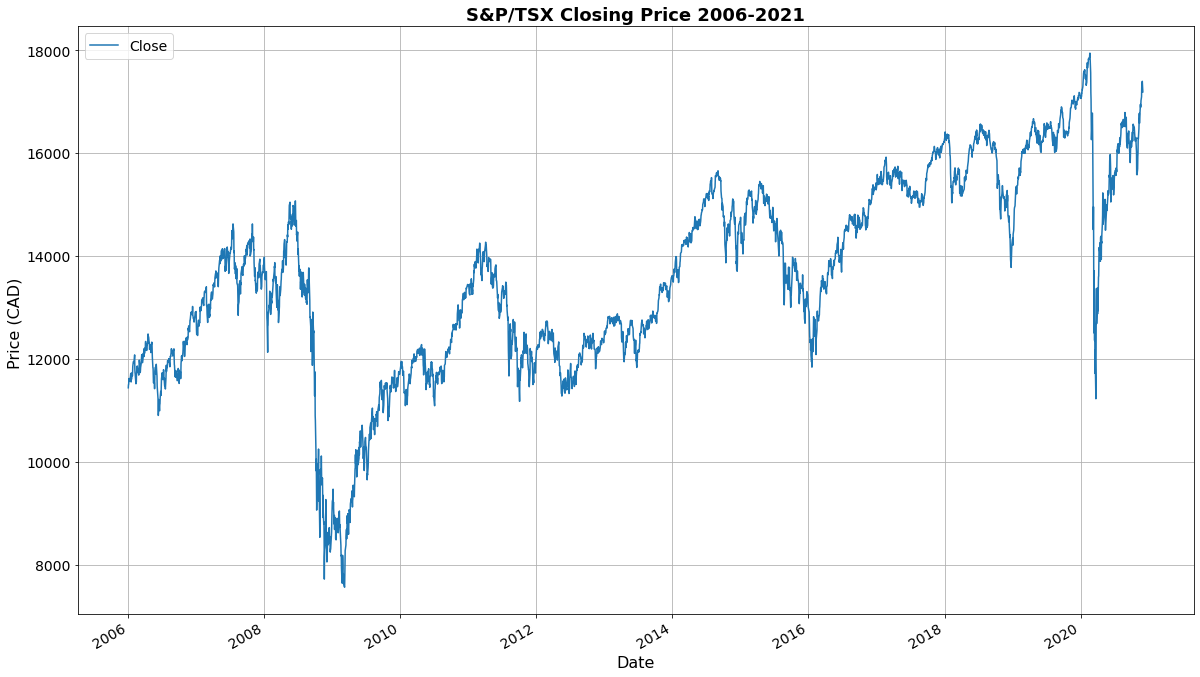

In [6]:
df.plot(figsize = (20,12), fontsize = 14)
plt.title('S&P/TSX Closing Price 2006-2021', fontdict = {'fontweight':'bold', 'fontsize':18}) 
plt.xlabel('Date', size = 16)
plt.ylabel('Price (CAD) ', size = 16)
plt.legend(fontsize = 14, loc = 2)
plt.grid(True)

In [7]:
df = pd.read_csv('df.csv')
df['S&P/TSX Return'] = df.pct_change()
df.dropna(inplace = True)

In [8]:
returns = df['S&P/TSX Return']
returns

1       0.005235
2       0.000539
3       0.009802
4      -0.004759
5       0.002801
          ...   
3740    0.010518
3741    0.002246
3742    0.002206
3743    0.002611
3744   -0.011859
Name: S&P/TSX Return, Length: 3744, dtype: float64

In [9]:
returns.describe()

count    3744.000000
mean        0.000177
std         0.011644
min        -0.123447
25%        -0.004073
50%         0.000738
75%         0.005231
max         0.119571
Name: S&P/TSX Return, dtype: float64

In [10]:
returns = pd.Series(returns).array
returns

<PandasArray>
[ 0.0052353160982769875,  0.0005390771040734155,   0.009802115346509321,
 -0.0047588145680048655,   0.002801457261036644,  0.0020176925754604724,
 -0.0022201019436794978,  0.0008278950956690512,   0.010013115027246222,
  -0.002678985634758102,
 ...
  0.0034517179261059905, -0.0034398445529993937,  0.0011841465899469217,
   0.006463637835768754,   0.004430339580565379,   0.010518048568253002,
  0.0022460433343336472,  0.0022064894638689214,   0.002610687734371453,
  -0.011858571948383911]
Length: 3744, dtype: float64

In [11]:
mu = returns.mean()
mu

0.00017695513212442248

In [12]:
sigma = returns.std()
sigma

0.01164357837691955

In [13]:
min(returns)

-0.12344690349727383

In [14]:
max(returns)

0.11957070039408646

In [15]:
x = np.linspace(-0.12, 0.12, num = 1000)
y = stats.norm.pdf(x, loc = mu, scale = sigma)                    

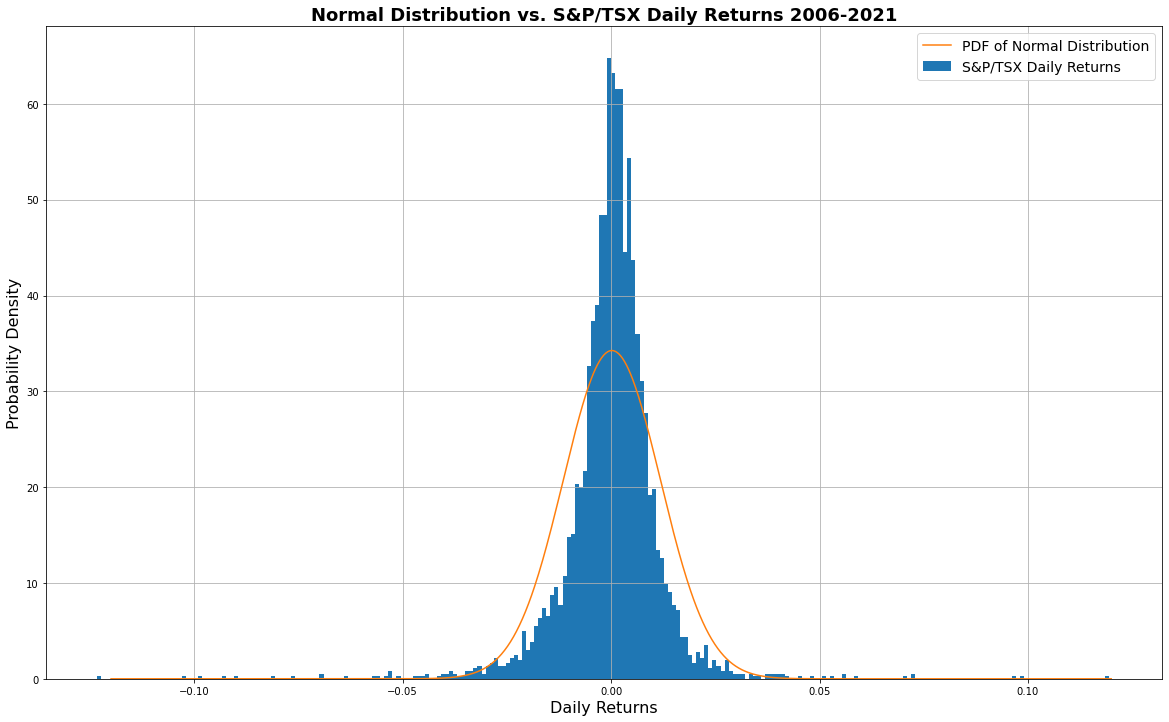

In [16]:
plt.figure(figsize = (20,12))
plt.hist(returns, bins = 250, density = True, label = 'S&P/TSX Daily Returns')
plt.plot(x, y, label = 'PDF of Normal Distribution')
plt.xlabel('Daily Returns', fontsize = 16)
plt.ylabel('Probability Density', fontsize = 16)
plt.title('Normal Distribution vs. S&P/TSX Daily Returns 2006-2021', fontdict = {'fontweight':'bold', 'fontsize':18})
plt.legend(fontsize = 14)
plt.grid(True)

In [17]:
stats.skew(returns)

-0.6896463207725343

In [18]:
stats.skewtest(returns)

SkewtestResult(statistic=-15.68547218299696, pvalue=1.9014391212892542e-55)

In [19]:
stats.kurtosis(returns)

18.6307381898321

In [20]:
stats.kurtosistest(returns)

KurtosistestResult(statistic=29.987807124138563, pvalue=1.4152187316793853e-197)

In [21]:
stats.normaltest(returns)

NormaltestResult(statistic=1145.302613718107, pvalue=1.9984688182365528e-249)

## Value-at-Risk (VaR) - Historical Simulation

### 1-day Value-at-Risk (VaR) of 1 Million CAD

In [22]:
S0 = 1000000                
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var_h = stats.scoreatpercentile(returns, percs) * S0
for x, y in zip(percs, var_h):
    print(f'1-day VaR of 1,000,000 CAD with {100-x}% confidence = {-y:.2f}$')

1-day VaR of 1,000,000 CAD with 99.99% confidence = 115672.71$
1-day VaR of 1,000,000 CAD with 99.9% confidence = 90976.95$
1-day VaR of 1,000,000 CAD with 99.0% confidence = 33817.12$
1-day VaR of 1,000,000 CAD with 97.5% confidence = 23186.39$
1-day VaR of 1,000,000 CAD with 95.0% confidence = 16984.10$
1-day VaR of 1,000,000 CAD with 90.0% confidence = 10891.33$


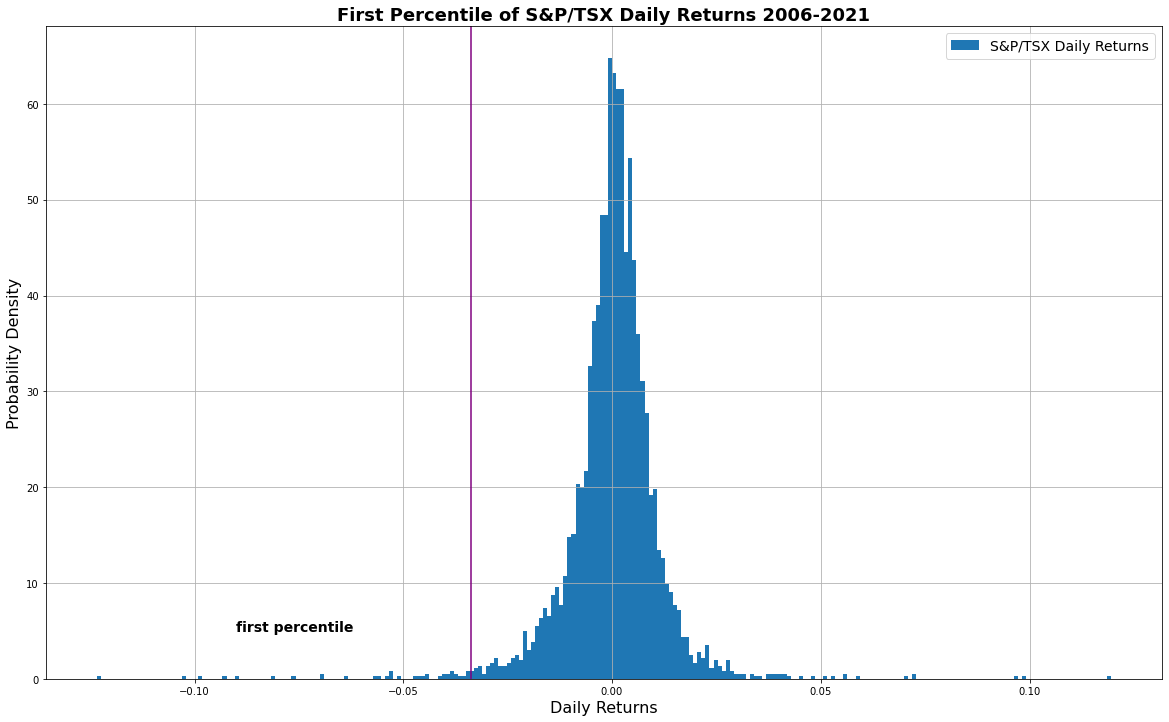

In [23]:
plt.figure(figsize = (20,12))
plt.hist(returns, bins = 250, density = True, label = 'S&P/TSX Daily Returns')
plt.axvline(var_h[2]/S0, color = 'purple')
plt.xlabel('Daily Returns', fontsize = 16)
plt.ylabel('Probability Density', fontsize = 16)
plt.text(-0.09, 5, 'first percentile', fontdict = {'fontweight':'bold', 'fontsize':14})
plt.title('First Percentile of S&P/TSX Daily Returns 2006-2021', fontdict = {'fontweight':'bold', 'fontsize':18})
plt.legend(fontsize = 14)
plt.grid(True)
plt.show()

## Monte Carlo Simulation - Bootstrapping Method 

In [24]:
S0 = 1000000
days = 63

In [25]:
def path_simul_bootstrap(daily_returns, S0, days, sims = 10000):               

    np.random.seed(0)
    days = int(days)
    ret = np.random.choice(returns, size = sims * days, replace = True).reshape(sims, days)
    
    paths = (1 + ret).cumprod(axis = 1) * S0
    paths = np.hstack((np.ones((sims,1)) * S0, paths))
    
    return paths

In [26]:
paths = path_simul_bootstrap(returns, S0 = S0, days = days)
paths

array([[1000000.        , 1002556.32915086, 1009979.00348739, ...,
        1033647.08986626, 1033811.17124823, 1038349.91406078],
       [1000000.        , 1033865.90995974, 1036414.31790443, ...,
        1199515.80334247, 1202389.15178141, 1198199.76730379],
       [1000000.        ,  999165.8332832 ,  999903.64867942, ...,
         975919.04613865,  987917.93992558,  983674.69754794],
       ...,
       [1000000.        , 1011837.89065719, 1032669.07379545, ...,
        1094603.57022389, 1101951.23291981, 1106155.6760689 ],
       [1000000.        , 1001337.13274568, 1001763.93546776, ...,
         938927.9315388 ,  933990.38198052,  937273.81944655],
       [1000000.        , 1002384.24618726, 1018667.50265984, ...,
        1157443.20039491, 1163397.7541382 , 1169383.60042873]])

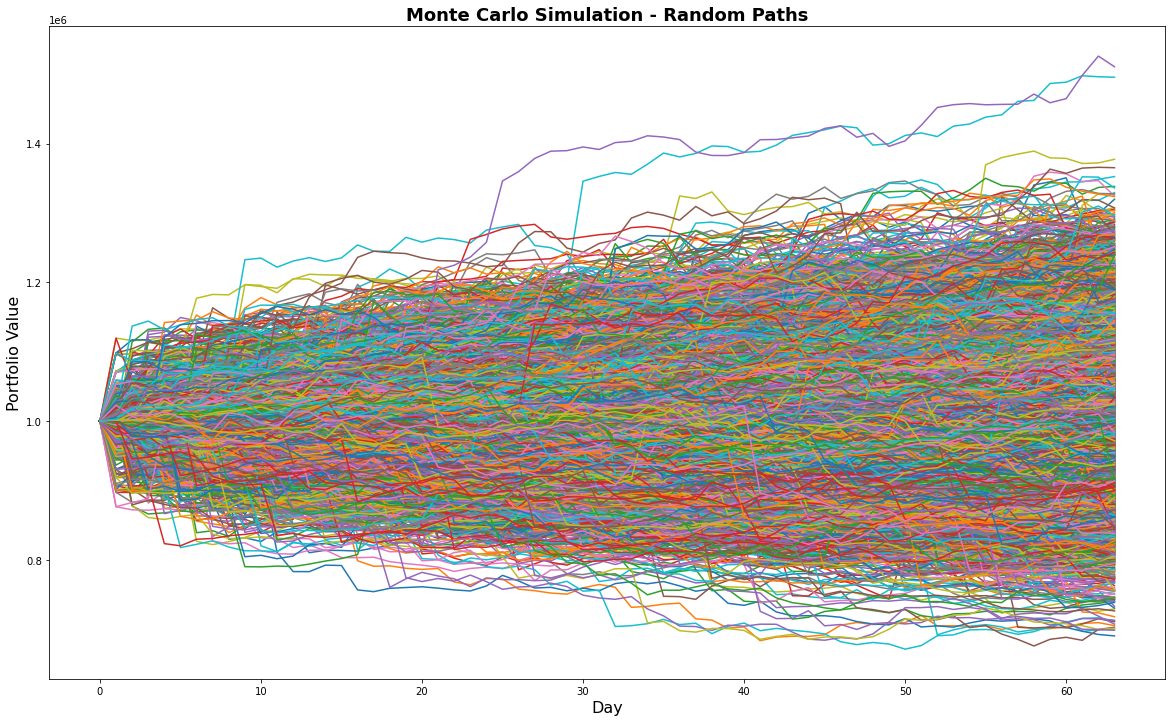

In [27]:
plt.figure(figsize = (20,12))
plt.plot(paths.T)
plt.xlabel('Day', fontsize = 16)
plt.ylabel('Portfolio Value', fontsize = 16)
plt.title('Monte Carlo Simulation - Random Paths', fontdict = {'fontweight':'bold', 'fontsize':18})
plt.show()

In [28]:
S0 = 1000000
days = 63
sims = 1000000

In [29]:
paths = path_simul_bootstrap(returns, S0 = S0, days = days,  sims = sims)
final_values = paths[:, -1]

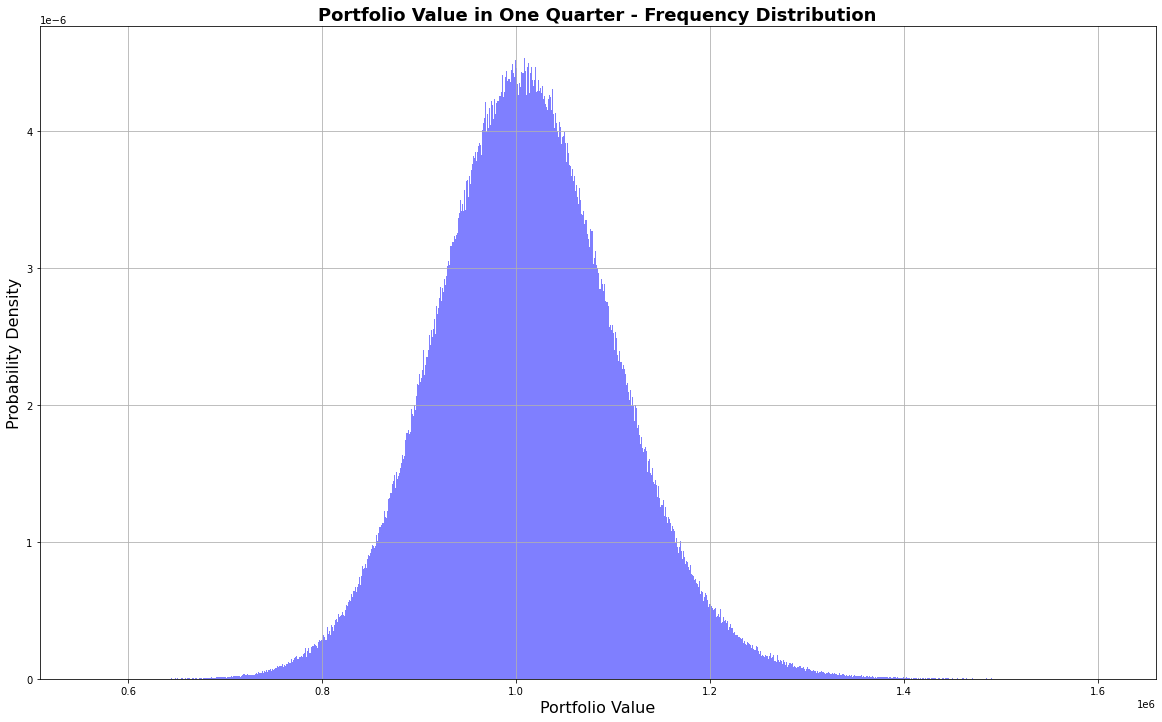

In [30]:
plt.figure(figsize = (20,12))
plt.hist(final_values, bins = 1000, density = True, alpha = 0.5, color = 'b')
plt.xlabel('Portfolio Value', fontsize = 16)
plt.ylabel('Probability Density', fontsize = 16)
plt.title('Portfolio Value in One Quarter - Frequency Distribution', fontdict = {'fontweight':'bold', 'fontsize':18})
plt.grid(True)

In [31]:
np.mean(final_values)

1011168.6994376575

In [32]:
np.median(final_values)

1008846.3820086619

In [33]:
np.std(final_values)

93572.4708723459

In [34]:
stats.skew(final_values)

0.18342512609115405

In [35]:
final_values

array([1038349.91406078, 1198199.76730379,  983674.69754794, ...,
        918170.29745235, 1077523.16737025, 1159363.81983519])

In [36]:
def var_bootstrap(daily_returns, S0, days, perc, sims = 1000000):
    
    np.random.seed(0)
    days = int(days)
    ret = np.random.choice(returns, size = sims * days, replace = True).reshape(sims, days)
    
    final = (1 + ret).prod(axis = 1) * S0
    var = stats.scoreatpercentile(final, perc) - S0                  
    
    return var

In [37]:
var_63 = var_bootstrap(returns, S0 = 1000000, days = 63, perc = percs, sims = 1000000)
var_63

array([-324672.44654456, -269379.15297502, -200598.52534014,
       -166733.46531418, -138205.58490714, -105550.88214716])

### 63-day Value-at-Risk (VaR) of 1 Million CAD 

In [38]:
for x, y in zip(percs, var_63):
    print(f'63-day VaR for 1,000,000 CAD with {100-x}% confidence = {-y:.2f}')

63-day VaR for 1,000,000 CAD with 99.99% confidence = 324672.45
63-day VaR for 1,000,000 CAD with 99.9% confidence = 269379.15
63-day VaR for 1,000,000 CAD with 99.0% confidence = 200598.53
63-day VaR for 1,000,000 CAD with 97.5% confidence = 166733.47
63-day VaR for 1,000,000 CAD with 95.0% confidence = 138205.58
63-day VaR for 1,000,000 CAD with 90.0% confidence = 105550.88


In [39]:
var_days = []
for i in range(1, 252 + 1):
    var_days.append(-var_bootstrap(returns, S0 = 1000000, days = i, perc = 1))        

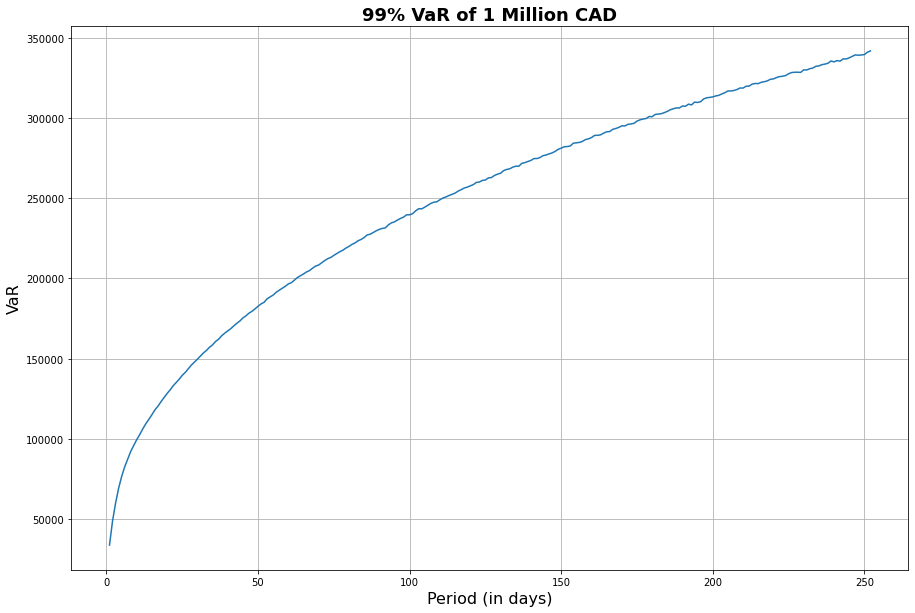

In [40]:
plt.figure(figsize = (15,10))
plt.plot(range(1, 252 + 1), var_days)
plt.xlabel('Period (in days)', fontsize = 16)
plt.ylabel('VaR', fontsize = 16)  
plt.title('99% VaR of 1 Million CAD', fontdict = {'fontweight':'bold', 'fontsize':18})
plt.grid(True)

In [41]:
var_perc = []
for i in np.linspace(0.1, 5, 100):
    var_perc.append(-var_bootstrap(returns, S0 = 1000000, days = 63, perc = i))

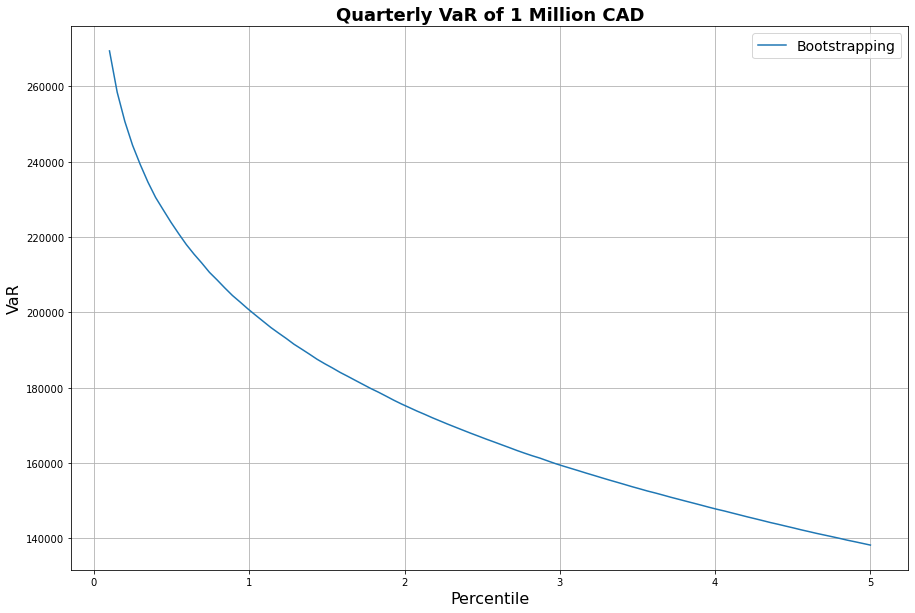

In [42]:
plt.figure(figsize = (15,10))
plt.plot(np.linspace(0.1, 5, 100), var_perc, label = 'Bootstrapping')
plt.xlabel('Percentile', fontsize = 16)
plt.ylabel('VaR', fontsize = 16)  
plt.title('Quarterly VaR of 1 Million CAD', fontdict = {'fontweight':'bold', 'fontsize':18})
plt.legend(fontsize = 14)
plt.grid(True)

## Conditional Value-at-Risk (CVaR)

In [43]:
final_values

array([1038349.91406078, 1198199.76730379,  983674.69754794, ...,
        918170.29745235, 1077523.16737025, 1159363.81983519])

In [44]:
percs

[0.01, 0.1, 1.0, 2.5, 5.0, 10.0]

In [45]:
stats.scoreatpercentile(final_values, percs)

array([675327.55345544, 730620.84702498, 799401.47465986, 833266.53468582,
       861794.41509286, 894449.11785284])

In [46]:
percentile = 1

In [47]:
tail = final_values[final_values < stats.scoreatpercentile(final_values, percentile)]
tail

array([729257.39434385, 705147.70355267, 773246.74915729, ...,
       788494.78264618, 730086.98336239, 763028.53180642])

In [48]:
cvar = tail.mean() - S0
cvar

-231432.12448711589

In [49]:
def cvar_quart(values, percentile):
    tail = values[values < stats.scoreatpercentile(values, percentile)]
    cvar = tail.mean() - S0
    return cvar        

In [50]:
cvar_quart(values = final_values, percentile = 1)

-231432.12448711589

In [51]:
cvar = []
for x in percs:
    cvar.append(cvar_quart(values = final_values, percentile = x))

In [52]:
cvar

[-346776.9126759878,
 -294879.1797758691,
 -231432.12448711589,
 -201425.65699565143,
 -176279.01250802237,
 -148359.43842883722]

### 63-day Conditional Value-at-Risk (CVaR) of 1 Million CAD

In [53]:
for pair in zip(percs, cvar):
    print(f'63-day CVaR of 1,000,000 CAD with {100-pair[0]}% confidence = {-pair[1]:.2f}$')

63-day CVaR of 1,000,000 CAD with 99.99% confidence = 346776.91$
63-day CVaR of 1,000,000 CAD with 99.9% confidence = 294879.18$
63-day CVaR of 1,000,000 CAD with 99.0% confidence = 231432.12$
63-day CVaR of 1,000,000 CAD with 97.5% confidence = 201425.66$
63-day CVaR of 1,000,000 CAD with 95.0% confidence = 176279.01$
63-day CVaR of 1,000,000 CAD with 90.0% confidence = 148359.44$
